# HW10

## Ex01

In [60]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [61]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate
from thinkdsp import Wave

In [62]:
if not os.path.exists('180960__kleeb__gunshot.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/180960__kleeb__gunshot.wav

In [63]:
from thinkdsp import read_wave

response = read_wave('180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.normalize()
# response.plot()
# decorate(xlabel='Time (s)')
transfer = response.make_spectrum()
response.make_audio()

In [64]:
if not os.path.exists('92002__jcveliz__violin-origional.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/92002__jcveliz__violin-origional.wav

89106
89106


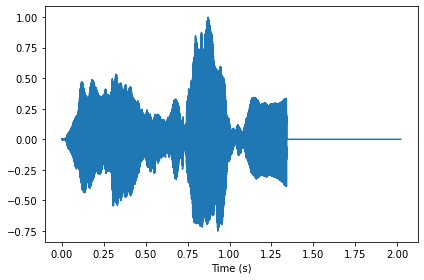

In [65]:
violin = read_wave('92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)
print(len(response))

zero_lens = 30000
violin.truncate(len(response))
violin.ys = violin.ys[:-zero_lens]
violin.ys = np.pad(violin.ys,(0,zero_lens),'constant',constant_values=(0,0))

print(len(violin.ys))
violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')


In [66]:
spectrum = violin.make_spectrum()
violin.make_audio()

In [67]:
output = (spectrum * transfer).make_wave()
output.normalize()
output.make_audio()

在這個例子中，改變zero_lens就可以設定音訊最後多少長度為0。

當zero_lens<1000時，幾乎不會有改變。

而zero_lens>30000時，可以明顯聽到生成的音訊比較正常，沒有被大幅影響。

這是因為dft計算時會將音訊循環，乘上filter時當下的音訊會受到前後值得影響。所以產生的結果開頭會受到結尾音訊的影響。只要補上適當的0，在循環卷積時就不會乘到後面的數值，就可以減少影響。

## Ex02

upload impulseresponseheslingtonchurch-003.wav to colab

In [68]:
from thinkdsp import read_wave

response = read_wave('impulseresponseheslingtonchurch-003.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)
response.truncate(89106)
response.normalize()
response.framerate = 44100
# response.plot()
# decorate(xlabel='Time (s)')
transfer = response.make_spectrum()
response.make_audio()

In [69]:
if not os.path.exists('92002__jcveliz__violin-origional.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/92002__jcveliz__violin-origional.wav

89106
89106


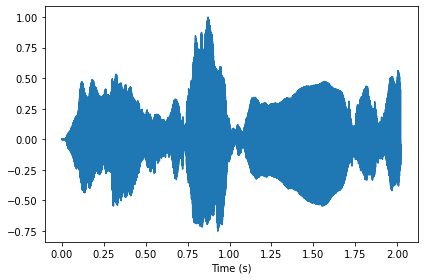

In [70]:
violin = read_wave('92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)
print(len(response))

# zero_lens = 30000
violin.truncate(len(response))
# violin.ys = violin.ys[:-zero_lens]
# violin.ys = np.pad(violin.ys,(0,zero_lens),'constant',constant_values=(0,0))

spectrum = violin.make_spectrum()

print(len(violin.ys))
violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')


In [71]:
print(violin.framerate)
print(response.framerate)

44100
44100


Way I, 頻譜相乘

In [72]:
output = (spectrum * transfer).make_wave()
output.write('audio1.wav')
output.normalize()
output.make_audio()

Writing audio1.wav


c:\Users\a9876\Documents\MEGA\CGU\110-2 Signal and System\code\hw10\thinkdsp.py:1173: UserWarning: Warning: normalizing before quantizing.
  warnings.warn("Warning: normalizing before quantizing.")


Way II, 脈衝響應卷積

In [73]:
violin = violin.convolve(response)
violin.write('audio2.wav')
violin.normalize()
violin.make_audio()

Writing audio2.wav


可以聽出兩者結果大致相同。為小提琴聲在開放環境撥放的聲音。事實上這個脈衝響應數據來自於一個教堂式的開闊環境，所以可以聽出類似回音。

惟頻譜相乘牽涉到DFT的週期運算，導致開頭部分受到干擾，聽得到雜音。

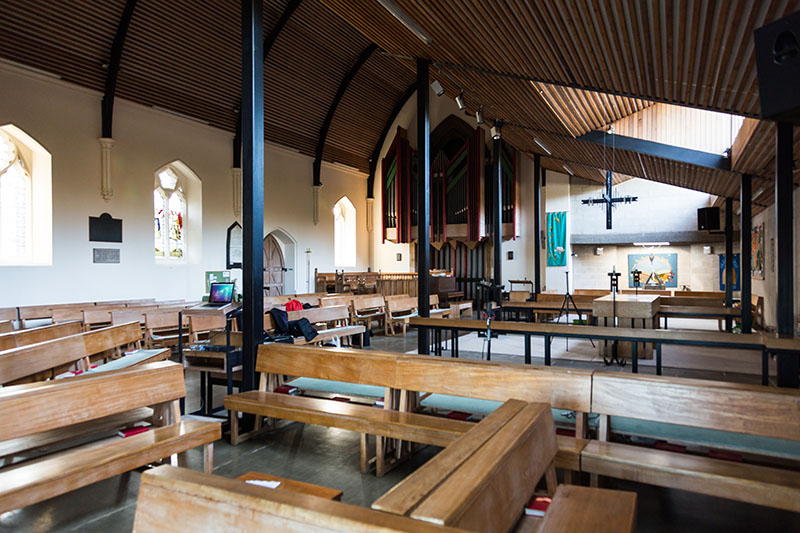

In [1]:
from IPython.display import Image
Image('bg/images/heslington_church_impulse_response-5075.jpg')